In [1]:
# Packages

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Building the spatial domain

L = 50  # Length of the domain
dx = 0.1  # Spatial step size
x = np.arange(-L/2, L/2, dx)  # Spatial grid

In [3]:
# Building the time domain

T = 100  # Total simulation time
dt = 0.1  # Temporal step size
t = np.arange(0, T, dt)  # Temporal grid

$w(x)=e^{-x^{2}/2\sigma^{2}}$

In [9]:
# Choosing the Gaussian connectivity kernel

sigma = 5  # Width of the kernel
w = lambda x: np.exp(-x**2/(2*sigma**2))  # Gaussian kernel

$\sigma=\frac{1}{1+e^{-\alpha u}}$

In [4]:
# Define the input-output function

alpha = 0.8  # Gain parameter
F = lambda u: 1/(1 + np.exp(-alpha*u))  # Sigmoid function

Zero exteneral input: $I(x,t)=0$

In [5]:
# Define the external input
I = lambda x, t: 0  # No external input

In [8]:
# Initial condition

u0 = np.zeros_like(x)

Neural Field Equation: $\frac{\partial u(x,t)}{\partial t}=-u(x,t)+\int w(x-y)F(u(y,t))dy+I(x,t)$

In [10]:
# Solve the neural field equation using the Euler method
u = np.zeros((len(x), len(t)))
u[:, 0] = u0
for i in range(len(t) - 1):
    du_dt = -u[:, i] + np.sum(w(np.abs(x[:, np.newaxis] - x[np.newaxis, :]))*F(u[:, i]), axis=1) + I(x, t[i])
    u[:, i+1] = u[:, i] + dt*du_dt

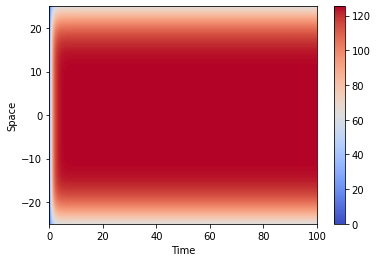

In [11]:
# Plotting the results

plt.imshow(u, aspect='auto', cmap='coolwarm', extent=[0, T, -L/2, L/2])
plt.xlabel('Time')
plt.ylabel('Space')
plt.colorbar()
plt.show()